# Multilingual Evaluation

In this section, we want to find out whether the combination of multiple languages increases the prediction accuracy when compared to training with only one language. This procedure increases total size of training data and would - in case of general predictive features in spoken emotions - increase the likelyhood that such features would be detected. Thereby, we replicate the study from the main paper by Lattif et al. so we look into the combination of the "western" languages in training data while testing on Urdu data. Since the testing on the individual "western" language datasets with models trained on Urdu are covered in our cross-lingual analysis, we will not cover them again here (see cross_lingual_prediction.ipynb). 

First, we import the result data from our multilingual analysis (see multilingual_prediction.ipynb).
Second, we plot the performance differences between the six different models (SVM (linear and rbf), log. Regression, Random Forest, XGBoost, Dummy) we used for training for each setting individually.
Third, we plot the performances of our multilingual comparison using XGBoost (best performing model) with Balanced Accuracy (same metric used in the main paper). Here, we compare our result to the baseline accuracy of Urdu to see whether the results correspond to general performance of the model on that language. 

By analyzing multilingual emotion recognition, we hope to find whether emotion expressions in speech are to some extend similar across different cultural and lingual backgrounds. That would be the case if we found that emotion detection score is increased when a model trained on multiple languages tested on Urdu is more accurate than a randomized dummy and the combination of more languages increases accuracy compared to fewer languages. Latter could change the accuracy since crosslingual features might not be as significant for one particular language but more obvious when looking at multiple different languages and cultural backgrounds.

In [1]:
# dependecies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Training with Urdu
train_engger = pd.read_csv(r'multilingual_english_and_german.csv')
train_engita = pd.read_csv(r'multilingual_english_and_italian.csv')
train_gerita = pd.read_csv(r'multilingual_german_and_italian.csv')
train_western = pd.read_csv(r'multilingual_western.csv')

# Baseline Urdu for comparison
baseline_urdu = pd.read_csv(r'..\Baseline\urdu_results.csv')

In [3]:
# Melt the DataFrame to long format for easier plotting
train_engger = train_engger.melt(id_vars="Model", var_name="Metric", value_name="Score")
train_engita = train_engita.melt(id_vars="Model", var_name="Metric", value_name="Score")
train_gerita = train_gerita.melt(id_vars="Model", var_name="Metric", value_name="Score")
train_western = train_western.melt(id_vars="Model", var_name="Metric", value_name="Score")

In [4]:
# Define dataset names
names = ['English and German', 'English and Italian', 'German and Italian', 'English, German and Italian', 'Urdu']

# combine dataframes
df_multilingual = [train_engger, train_engita, train_gerita, train_western, baseline_urdu]
combined_dfs = pd.concat(
        [df.assign(Dataset=name) for df, name in zip(df_multilingual, names)],
        ignore_index=True
    )

In [5]:
# plot
def plot_results(df, title):
    plt.figure(figsize=(10, 6))
    sns.set_theme(style="whitegrid")

    sns.barplot(x="Metric", y="Score", hue="Model", data=df, palette="viridis")
    plt.title(title)
    plt.xlabel("Metric", fontsize = 12)
    plt.ylabel("Score", fontsize = 12)
    plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [6]:
def plot_multilingual_vs_urdu(df_multilingual, datasets, title):

    scores = [df_multilingual[df_multilingual['Dataset'] == ds]['Score'].values[0] * 100 for ds in datasets]

    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    ax = sns.barplot(x="Dataset", y=scores, hue="Dataset", data=df_multilingual, palette="viridis")

    plt.title(title)
    plt.xlabel("Dataset", fontsize = 12)
    plt.ylabel("Accuracy (%)", fontsize = 12)
    for p in ax.patches:
        ax.annotate(
            f"{p.get_height():.2f}",  # Format score as 2 decimal places
            (p.get_x() + p.get_width() / 2, p.get_height()),  # Center the label
            ha='center',  # Center horizontally
            va='bottom',  # Place text slightly above bar
            fontsize=10,
            color='black'
        )
    plt.tight_layout()
    plt.show()

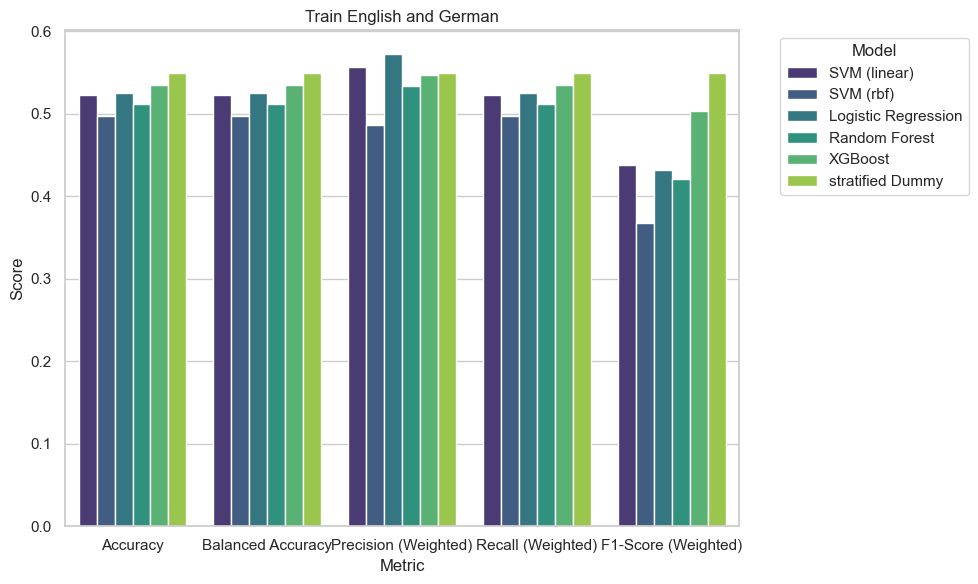

In [7]:
plot_results(train_engger, "Train English and German")

For the models trained on the English and German dataset the performance is worse than the random dummy for every model across all metrics but the weighted precision, where linear support vector machine and logistic regression perform minimally better than the dummy. Hence, we conclude that the training data based on English and German might not contain expressions of emotion that can be used to detect emotions in the Urdu testing data, indicating that emotions are expressed differently in Urdu, English and German.

Compared to English-only or German-only training with testing on Urdu the combination of German and English decreases the scores.
Therefore, we conclude that the underlying features determining emotional expressions in English and German combined do not align better with the features that define Urdu.

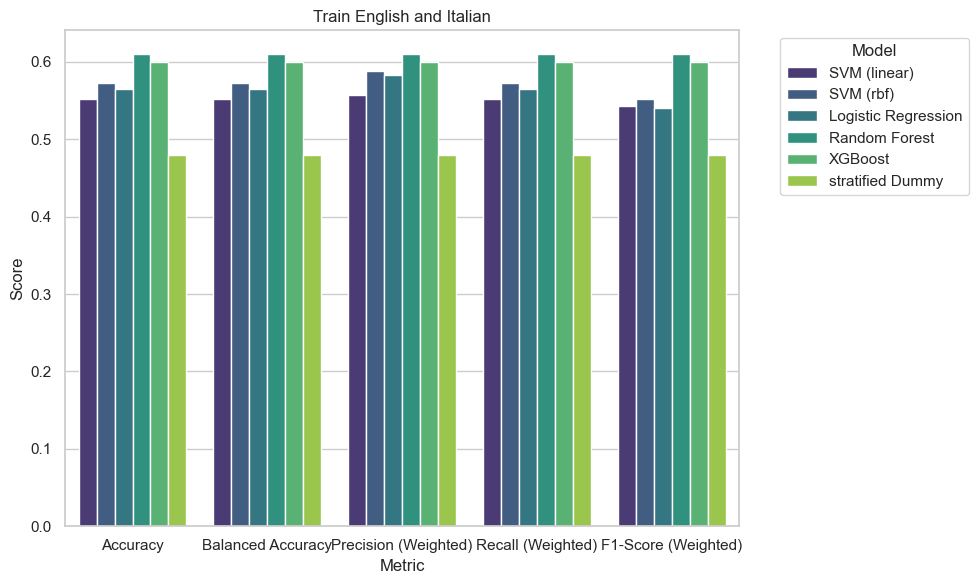

In [8]:
plot_results(train_engita, "Train English and Italian")

For the models trained on the English and Italian dataset the performance is better than the random dummy for every model across all metrics and models. Hence, we conclude that the training data based on English and Italian might contain expressions of emotion that can be used to detect emotions in the Urdu testing data, indicating that emotions are expressed similar to some extend in Urdu, English and Italian. 

Compared to English-only or Italian-only training with testing on Urdu the combination of Italian and English exceeds. Compared to Italian the models become more stable when combining training data with English data (in Italian only there were outliers depending on the model), although random forest and XGBoost perform best here. Therefore, we conclude that adding Italian and English together increases the stability and overall performance of models in detecting emotions in spoken Urdu. 

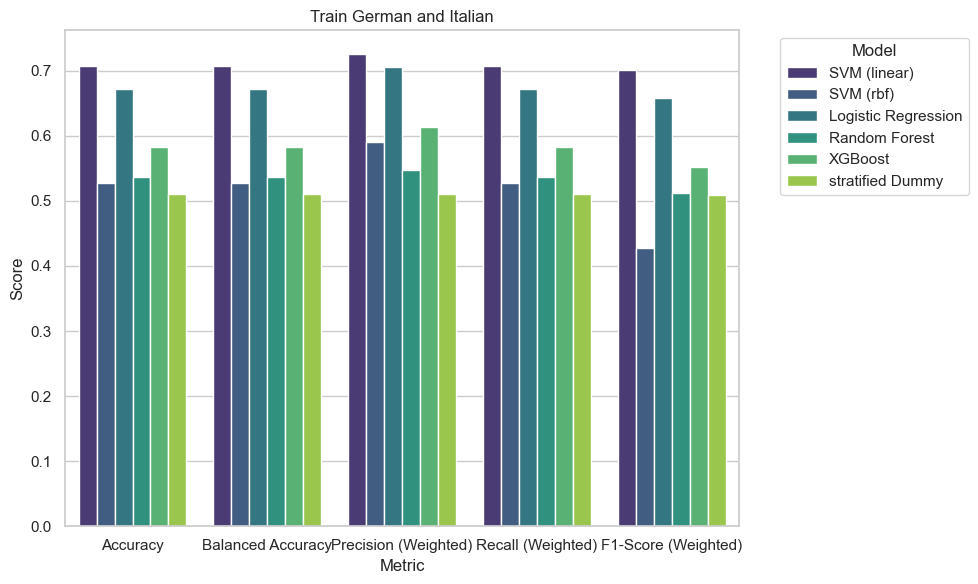

In [9]:
plot_results(train_gerita, "Train German and Italian")

For the models trained on the German and Italian dataset the performance is better than the random dummy for every model across all metrics and models except the F1-score for radial basis function support vector machines. Hence, we conclude that the training data based on German and Italian might contain expressions of emotion that can be used to detect emotions in the Urdu testing data, indicating that emotions are expressed similar to some extent in Urdu, German and Italian. 

Compared to German-only or Italian-only training with testing on Urdu the combination of Italian and German doesn't seem to change performance largely. Compared to Italian-only the models show a similar performance pattern with linear support vector machines and logistic regression performing better and radial basis function support vector machines performing worse than average. Compared to German-only the models show a more stable pattern but still have similar scores. Hence, we conclude that the features used for Italian-only or German-only analysis are similar to those used for German-Italian analysis. 

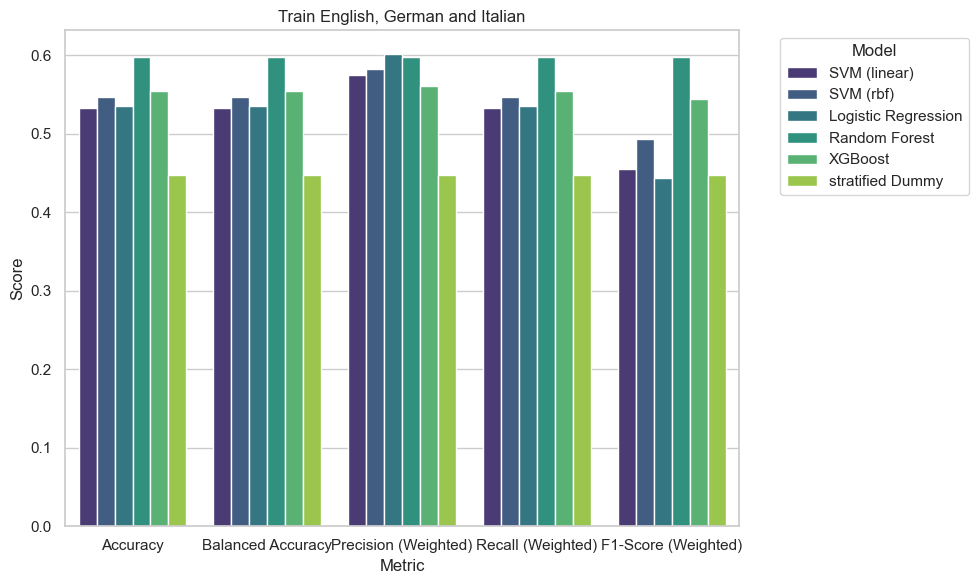

In [10]:
plot_results(train_western, "Train English, German and Italian")

For the models trained on all three "western" datasets the performance is better than the random dummy for every model across all metrics and models except the F1-score for logistic regression. Hence, we conclude that the training data based on all three "western" languages might contain expressions of emotion that can be used to detect emotions in the Urdu testing data, indicating that emotions are expressed to some extent similar across multilingual and multicultural backgrounds. 

Compared to one-language-only training, the three-language trained models are more stable. It is not surprising that using more datapoints for training increases stability. However, since performance is still better than random when training on all three languages we conclude that there are some features of emotional expression contained in all four languages further suggesting emotions are to some extent expressed similarly across crosslingually. 

In [11]:
# Replicate plot from the paper

# testing with urdu
df_multilingual_accuracy = combined_dfs[((combined_dfs["Metric"] == "Balanced Accuracy") | (combined_dfs["Metric"] == "balanced_accuracy")) & (combined_dfs["Model"] == "XGBoost")]

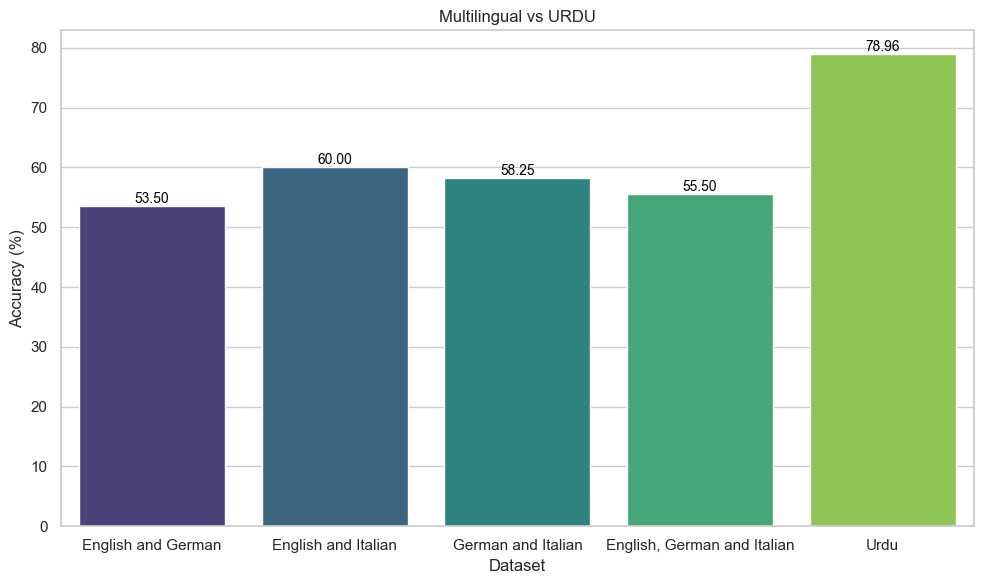

In [12]:
plot_multilingual_vs_urdu(df_multilingual=df_multilingual_accuracy, datasets=names, title="Multilingual vs URDU")

Compared to a model trained on Urdu, all models trained on multiple "western" languages perform worse. This indicates that although there might be some underlying general features of emotional expression there are many language-specific indicators for an emotion making a model trained on a language more accuracte when testing the same language than when testing another language. Accuracy is highest for the combination of English and Italian, followed by German and Italian. Combined with the information that Italian performs best in the cross-lingual comparison this indicates that Italian probably has the biggest impact on Model accuracy when detecting Urdu cross-lingually. This assumption is supported by the combination of all three languages performing worse than any combination containing Italian but better than the combination of just English and German (that didn't perform better than coincidence-level)

# Conclusion
Conclusively, we find that there are some general features of emotional expression across languages. The combination of more languages stabilizes results across models so more datapoints are less prone to error even if they are taken from different languages. However, most features are likely to be language specific and Italian seems to be represented especially well.

### Replication of the main study
We have not been able to replicate the results of the study by Lattif et al. since the exact procedure was not described in detail. We guessed how they proceeded and replicate likewise based on the description provided. Unfortunately, our results turned out to be very different across all settings. 